# Football player Dataset Cleaning and Preparing

This dataset has been downloaded from  Kaggle https://www.kaggle.com/karangadiya/fifa19. License: [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [33]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, minmax_scale, scale

import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bk

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [34]:
INPUT_FILE_NAME = "/gdrive/My Drive/ANNDP_Practicas/datasets/FootballPlayerRawDataset.csv"
ATT_FILE_NAME = "/gdrive/My Drive/ANNDP_Practicas/datasets/FootballPlayerPreparedCleanAttributes.csv"
ONE_HOT_ENCODED_CLASSES_FILE_NAME = "/gdrive/My Drive/ANNDP_Practicas/datasets/FootballPlayerOneHotEncodedClasses.csv"

In [35]:
dataset = pd.read_csv(INPUT_FILE_NAME, sep=",")

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

**First step:** Remove unnecesary columns

In [37]:
dataset.drop(dataset.loc[:, 'Unnamed: 0':'Flag'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Potential':'Real Face'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Jersey Number':'RB'].columns, inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'GKDiving':'Release Clause'].columns, inplace=True, axis = 1)

Then, we remove the goal keepers.

In [38]:
dataset.drop(dataset[dataset.Position=='GK'].index, inplace=True)

In [39]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


In [40]:
dataset[-10:]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
18196,47,CM,31.0,28.0,40.0,53.0,31.0,46.0,39.0,37.0,...,30.0,55.0,44.0,28.0,51.0,44.0,35.0,41.0,44.0,54.0
18197,47,CM,44.0,44.0,36.0,53.0,43.0,50.0,48.0,46.0,...,37.0,37.0,28.0,39.0,48.0,49.0,52.0,41.0,47.0,38.0
18199,47,CM,31.0,31.0,41.0,51.0,26.0,46.0,35.0,31.0,...,30.0,53.0,49.0,35.0,40.0,36.0,40.0,48.0,49.0,49.0
18200,47,ST,28.0,47.0,47.0,42.0,37.0,39.0,32.0,25.0,...,51.0,26.0,16.0,46.0,37.0,58.0,50.0,15.0,17.0,14.0
18201,47,RB,22.0,23.0,45.0,25.0,27.0,21.0,21.0,27.0,...,16.0,44.0,45.0,20.0,31.0,38.0,43.0,44.0,47.0,53.0
18202,47,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0
18203,47,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0
18204,47,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0
18205,47,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0
18206,46,CM,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,...,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0


**Second Step:** find out whether or not there are missing values and remove the least influential attributes. 

In [41]:
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Position': 60,
 'Crossing': 48,
 'Finishing': 48,
 'HeadingAccuracy': 48,
 'ShortPassing': 48,
 'Volleys': 48,
 'Dribbling': 48,
 'Curve': 48,
 'FKAccuracy': 48,
 'LongPassing': 48,
 'BallControl': 48,
 'Acceleration': 48,
 'SprintSpeed': 48,
 'Agility': 48,
 'Reactions': 48,
 'Balance': 48,
 'ShotPower': 48,
 'Jumping': 48,
 'Stamina': 48,
 'Strength': 48,
 'LongShots': 48,
 'Aggression': 48,
 'Interceptions': 48,
 'Positioning': 48,
 'Vision': 48,
 'Penalties': 48,
 'Composure': 48,
 'Marking': 48,
 'StandingTackle': 48,
 'SlidingTackle': 48}

Since we have enough data, we remove all rows with missing values in any attribute

In [42]:
dataset.dropna (inplace=True)
{att : dataset[dataset[att].isnull()].shape[0] for att in dataset.columns}

{'Overall': 0,
 'Position': 0,
 'Crossing': 0,
 'Finishing': 0,
 'HeadingAccuracy': 0,
 'ShortPassing': 0,
 'Volleys': 0,
 'Dribbling': 0,
 'Curve': 0,
 'FKAccuracy': 0,
 'LongPassing': 0,
 'BallControl': 0,
 'Acceleration': 0,
 'SprintSpeed': 0,
 'Agility': 0,
 'Reactions': 0,
 'Balance': 0,
 'ShotPower': 0,
 'Jumping': 0,
 'Stamina': 0,
 'Strength': 0,
 'LongShots': 0,
 'Aggression': 0,
 'Interceptions': 0,
 'Positioning': 0,
 'Vision': 0,
 'Penalties': 0,
 'Composure': 0,
 'Marking': 0,
 'StandingTackle': 0,
 'SlidingTackle': 0}

In [43]:
dataset.shape

(16122, 31)

The **correlation matrix** permits to visualize dependencies between pairs of attributes: values close to -1 or +1 indicate a high correlation. A negative correlation value means than when the value of an attribute gets high, the value of the other attribute decreases, and vice-versa. Positive correlation values point out that both features increase or decrease simultaneously. 

In [44]:
dataset.corr()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,...,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,...,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,...,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,...,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933
ShortPassing,0.722720,0.632386,0.398895,0.131909,1.000000,0.469096,0.638983,0.614810,0.584412,0.842294,...,0.575126,0.305331,0.287053,0.501792,0.724511,0.384587,0.673243,0.244696,0.235083,0.203009
Volleys,0.452090,0.472485,0.814663,0.062357,0.469096,1.000000,0.674461,0.691624,0.618031,0.313951,...,0.786780,-0.064275,-0.334536,0.745740,0.659091,0.730061,0.504112,-0.357150,-0.402222,-0.430056
Dribbling,0.516363,0.712261,0.706635,-0.134535,0.638983,0.674461,1.000000,0.731726,0.599424,0.494533,...,0.724191,-0.059600,-0.190316,0.788939,0.758829,0.565716,0.509143,-0.214481,-0.244737,-0.258046
Curve,0.503054,0.714762,0.614189,-0.091652,0.614810,0.691624,0.731726,1.000000,0.788928,0.539851,...,0.730734,0.035402,-0.068820,0.673975,0.727416,0.593532,0.540471,-0.108242,-0.128246,-0.147523
FKAccuracy,0.455875,0.618580,0.537508,-0.076517,0.584412,0.618031,0.599424,0.788928,1.000000,0.554455,...,0.695764,0.075132,0.001575,0.562075,0.683214,0.589946,0.498877,-0.048092,-0.056328,-0.081250
LongPassing,0.585104,0.592781,0.218965,0.057267,0.842294,0.313951,0.494533,0.539851,0.554455,1.000000,...,0.461247,0.348801,0.425595,0.325664,0.651983,0.238135,0.577808,0.369965,0.384637,0.360727


In [45]:
dataset[:10]

,Overall,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,94,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,92,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
4,91,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0
5,91,LF,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,...,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0
6,91,RCM,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
7,91,RS,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
8,91,RCB,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0
10,90,ST,62.0,91.0,85.0,83.0,89.0,85.0,77.0,86.0,...,84.0,80.0,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0
11,90,LCM,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,...,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0


We remove "Position" and those attributes with a correlation value less than 0.4, assuming that they do not excessively influence the overall value. 

In [46]:
dataset.drop(['Position'], inplace=True, axis = 1)
"""
dataset.drop(['Finishing'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)
dataset.drop(['Balance'], inplace=True, axis = 1)
dataset.drop(['Jumping'], inplace=True, axis = 1)
dataset.drop(['Strength'], inplace=True, axis = 1)
dataset.drop(['Interceptions'], inplace=True, axis = 1)
dataset.drop(['Penalties'], inplace=True, axis = 1)
dataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)
"""

"\ndataset.drop(['Finishing'], inplace=True, axis = 1)\ndataset.drop(dataset.loc[:, 'Acceleration':'Agility'].columns, inplace=True, axis = 1)\ndataset.drop(['Balance'], inplace=True, axis = 1)\ndataset.drop(['Jumping'], inplace=True, axis = 1)\ndataset.drop(['Strength'], inplace=True, axis = 1)\ndataset.drop(['Interceptions'], inplace=True, axis = 1)\ndataset.drop(['Penalties'], inplace=True, axis = 1)\ndataset.drop(dataset.loc[:, 'Marking':'SlidingTackle'].columns, inplace=True, axis = 1)\n"

In [47]:
dataset.shape

(16122, 30)

**Third Step:** shuffle the dataset (three times).

In [48]:
dataset=dataset.sample(frac=1) #frac is the fraction of axis items to return. 1 means all of them
dataset=dataset.sample(frac=1)
dataset=dataset.sample(frac=1).reset_index(drop=True) #Reset index and drop the old one
dataset.head()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,71,69.0,68.0,66.0,69.0,49.0,75.0,60.0,69.0,59.0,...,66.0,60.0,37.0,72.0,69.0,64.0,71.0,55.0,44.0,31.0
1,69,71.0,62.0,38.0,76.0,75.0,64.0,76.0,68.0,63.0,...,68.0,49.0,28.0,63.0,69.0,50.0,56.0,35.0,33.0,47.0
2,64,31.0,64.0,72.0,57.0,56.0,51.0,55.0,52.0,42.0,...,53.0,66.0,29.0,64.0,46.0,76.0,68.0,21.0,43.0,23.0
3,66,51.0,66.0,70.0,52.0,52.0,64.0,46.0,32.0,34.0,...,56.0,57.0,20.0,65.0,49.0,73.0,60.0,40.0,17.0,16.0
4,66,62.0,55.0,67.0,69.0,51.0,64.0,57.0,55.0,67.0,...,59.0,67.0,64.0,58.0,63.0,45.0,61.0,61.0,63.0,62.0


**Fourth step:** The problem consists on classifying football players depending on their overall score (quality) into four categories: Poor, Intermediate, Good, and Excellent. We use a quatile-based discretization function to perform this task.  

In [49]:
labels = pd.qcut(dataset["Overall"],4,labels=False)

In [50]:
dataset.insert (1,"Quality",labels)
dataset[:10]

,Overall,Quality,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,71,2,69.0,68.0,66.0,69.0,49.0,75.0,60.0,69.0,...,66.0,60.0,37.0,72.0,69.0,64.0,71.0,55.0,44.0,31.0
1,69,2,71.0,62.0,38.0,76.0,75.0,64.0,76.0,68.0,...,68.0,49.0,28.0,63.0,69.0,50.0,56.0,35.0,33.0,47.0
2,64,1,31.0,64.0,72.0,57.0,56.0,51.0,55.0,52.0,...,53.0,66.0,29.0,64.0,46.0,76.0,68.0,21.0,43.0,23.0
3,66,1,51.0,66.0,70.0,52.0,52.0,64.0,46.0,32.0,...,56.0,57.0,20.0,65.0,49.0,73.0,60.0,40.0,17.0,16.0
4,66,1,62.0,55.0,67.0,69.0,51.0,64.0,57.0,55.0,...,59.0,67.0,64.0,58.0,63.0,45.0,61.0,61.0,63.0,62.0
5,78,3,63.0,64.0,42.0,74.0,57.0,84.0,75.0,42.0,...,55.0,67.0,21.0,76.0,77.0,63.0,78.0,42.0,30.0,29.0
6,73,3,66.0,63.0,63.0,73.0,49.0,70.0,69.0,40.0,...,63.0,78.0,70.0,67.0,68.0,61.0,71.0,70.0,71.0,69.0
7,62,0,33.0,63.0,59.0,47.0,41.0,61.0,42.0,28.0,...,55.0,41.0,21.0,57.0,44.0,59.0,51.0,15.0,12.0,19.0
8,54,0,43.0,39.0,36.0,49.0,28.0,52.0,37.0,29.0,...,36.0,50.0,48.0,41.0,33.0,44.0,39.0,53.0,56.0,57.0
9,59,0,28.0,19.0,44.0,56.0,24.0,33.0,21.0,28.0,...,18.0,77.0,47.0,23.0,29.0,45.0,53.0,49.0,61.0,55.0


Calculating the *Overall* intervals for each label.

In [51]:
intervals={label : [(dataset.loc[dataset["Quality"]==label].min()["Overall"]),
                    (dataset.loc[dataset["Quality"]==label].max()["Overall"])]
                    for label in range(4)}
intervals

{0: [46.0, 62.0], 1: [63.0, 66.0], 2: [67.0, 71.0], 3: [72.0, 94.0]}

The number of instances per label should be balanced.

In [52]:
dataset["Quality"].value_counts()

2    4353
0    4296
1    3868
3    3605
Name: Quality, dtype: int64

In [53]:
interval_names = [str(interval) for interval in intervals.values()]
interval_names[0]="Poor:"+interval_names[0]
interval_names[1]="Interm:"+interval_names[1]
interval_names[2]="Good:"+interval_names[2]
interval_names[3]="Excel:"+interval_names[3]
interval_names

['Poor:[46.0, 62.0]',
 'Interm:[63.0, 66.0]',
 'Good:[67.0, 71.0]',
 'Excel:[72.0, 94.0]']

In [54]:
dataset.drop(columns="Overall", inplace=True)
dataset[:10]

,Quality,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,2,69.0,68.0,66.0,69.0,49.0,75.0,60.0,69.0,59.0,...,66.0,60.0,37.0,72.0,69.0,64.0,71.0,55.0,44.0,31.0
1,2,71.0,62.0,38.0,76.0,75.0,64.0,76.0,68.0,63.0,...,68.0,49.0,28.0,63.0,69.0,50.0,56.0,35.0,33.0,47.0
2,1,31.0,64.0,72.0,57.0,56.0,51.0,55.0,52.0,42.0,...,53.0,66.0,29.0,64.0,46.0,76.0,68.0,21.0,43.0,23.0
3,1,51.0,66.0,70.0,52.0,52.0,64.0,46.0,32.0,34.0,...,56.0,57.0,20.0,65.0,49.0,73.0,60.0,40.0,17.0,16.0
4,1,62.0,55.0,67.0,69.0,51.0,64.0,57.0,55.0,67.0,...,59.0,67.0,64.0,58.0,63.0,45.0,61.0,61.0,63.0,62.0
5,3,63.0,64.0,42.0,74.0,57.0,84.0,75.0,42.0,66.0,...,55.0,67.0,21.0,76.0,77.0,63.0,78.0,42.0,30.0,29.0
6,3,66.0,63.0,63.0,73.0,49.0,70.0,69.0,40.0,70.0,...,63.0,78.0,70.0,67.0,68.0,61.0,71.0,70.0,71.0,69.0
7,0,33.0,63.0,59.0,47.0,41.0,61.0,42.0,28.0,32.0,...,55.0,41.0,21.0,57.0,44.0,59.0,51.0,15.0,12.0,19.0
8,0,43.0,39.0,36.0,49.0,28.0,52.0,37.0,29.0,38.0,...,36.0,50.0,48.0,41.0,33.0,44.0,39.0,53.0,56.0,57.0
9,0,28.0,19.0,44.0,56.0,24.0,33.0,21.0,28.0,45.0,...,18.0,77.0,47.0,23.0,29.0,45.0,53.0,49.0,61.0,55.0


**Fifth Step:** split the dataset vertically into attributes $x$ and label $t$ for supervised learning.

In [55]:
discretized_t = pd.DataFrame(data=dataset["Quality"].values,columns=["Quality"])
discretized_t[:10]

,Quality
0,2
1,2
2,1
3,1
4,1
5,3
6,3
7,0
8,0
9,0


In [56]:
x = dataset.drop (columns="Quality")
x.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,69.0,68.0,66.0,69.0,49.0,75.0,60.0,69.0,59.0,74.0,...,66.0,60.0,37.0,72.0,69.0,64.0,71.0,55.0,44.0,31.0
1,71.0,62.0,38.0,76.0,75.0,64.0,76.0,68.0,63.0,71.0,...,68.0,49.0,28.0,63.0,69.0,50.0,56.0,35.0,33.0,47.0
2,31.0,64.0,72.0,57.0,56.0,51.0,55.0,52.0,42.0,60.0,...,53.0,66.0,29.0,64.0,46.0,76.0,68.0,21.0,43.0,23.0
3,51.0,66.0,70.0,52.0,52.0,64.0,46.0,32.0,34.0,68.0,...,56.0,57.0,20.0,65.0,49.0,73.0,60.0,40.0,17.0,16.0
4,62.0,55.0,67.0,69.0,51.0,64.0,57.0,55.0,67.0,68.0,...,59.0,67.0,64.0,58.0,63.0,45.0,61.0,61.0,63.0,62.0


**Sixth Step:** one-hot encoding of labels (target values).

In [57]:
encoder = OneHotEncoder(categories="auto") # Function that one-hot encoders integers
one_hot_t = encoder.fit_transform(discretized_t.values.reshape(-1,1)).toarray()
one_hot_t[:10]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [58]:
one_hot_t = pd.DataFrame(data=one_hot_t,columns=interval_names)
one_hot_t[:10]

,"Poor:[46.0, 62.0]","Interm:[63.0, 66.0]","Good:[67.0, 71.0]","Excel:[72.0, 94.0]"
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,1.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


**Seventh Step:** Standardization or Normalization of the input dataset. *Standardization* is much less affected by outliers, but it does not bound values to a specific range, which may be a problem for neural networks. The center is the mean, and the data is scaled to unit variance. On the other hand, *max-min scaling* ranges the data within max and min values, usually -1, and 1 or \[0,1\].  

In [59]:
#x = pd.DataFrame(minmax_scale (x, feature_range=(-1,1)),columns=x.columns)
x = pd.DataFrame (scale (x),columns=x.columns)
x[:10]

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1.047888,1.113622,0.769874,0.649710,0.152551,1.151727,0.577463,1.497428,0.233953,1.078475,...,0.925576,0.028940,-0.714292,1.170478,1.047933,0.948730,1.049381,0.214142,-0.412986,-0.972127
1,1.189447,0.747254,-1.642765,1.365107,1.911506,0.272538,1.633939,1.431072,0.556846,0.778865,...,1.052729,-0.732528,-1.193075,0.557180,1.047933,-0.170338,-0.428675,-0.947480,-0.986776,-0.137447
2,-1.641729,0.869376,1.286868,-0.576684,0.626116,-0.766502,0.247315,0.369375,-1.138341,-0.319705,...,0.099083,0.444286,-1.139877,0.625324,-0.733342,1.907932,0.753770,-1.760615,-0.465148,-1.389466
3,-0.226141,0.991499,1.114537,-1.087681,0.355507,0.272538,-0.346953,-0.957747,-1.784127,0.479255,...,0.289812,-0.178733,-1.618660,0.693468,-0.501002,1.668132,-0.034526,-0.657074,-1.821379,-1.754639
4,0.552432,0.319824,0.856040,0.649710,0.287855,0.272538,0.379374,0.568443,0.879739,0.479255,...,0.480541,0.513511,0.722059,0.216458,0.583252,-0.570006,0.064011,0.562629,0.578106,0.645065
5,0.623212,0.869376,-1.298102,1.160708,0.693768,1.871063,1.567909,-0.294186,0.799015,1.777565,...,0.226236,0.513511,-1.565462,1.443056,1.667507,0.868797,1.739140,-0.540912,-1.143264,-1.076462
6,0.835550,0.808315,0.511377,1.058509,0.152551,0.752096,1.171731,-0.426898,1.121908,0.678995,...,0.734847,1.274979,1.041248,0.829757,0.970486,0.708930,1.049381,1.085358,0.995408,1.010238
7,-1.500170,0.808315,0.166714,-1.598679,-0.388666,0.032760,-0.611072,-1.223171,-1.945573,0.079775,...,0.226236,-1.286323,-1.565462,0.148314,-0.888236,0.549063,-0.921360,-2.109101,-2.082193,-1.598136
8,-0.792376,-0.657158,-1.815096,-1.394280,-1.268144,-0.686576,-0.941220,-1.156815,-1.461234,-0.918926,...,-0.981715,-0.663304,-0.129112,-0.941995,-1.740150,-0.649939,-2.103804,0.097980,0.212967,0.384228
9,-1.854068,-1.878385,-1.125771,-0.678883,-1.538752,-2.205174,-1.997696,-1.223171,-0.896172,-0.619316,...,-2.126090,1.205754,-0.182310,-2.168592,-2.049937,-0.570006,-0.724286,-0.134344,0.473781,0.279893


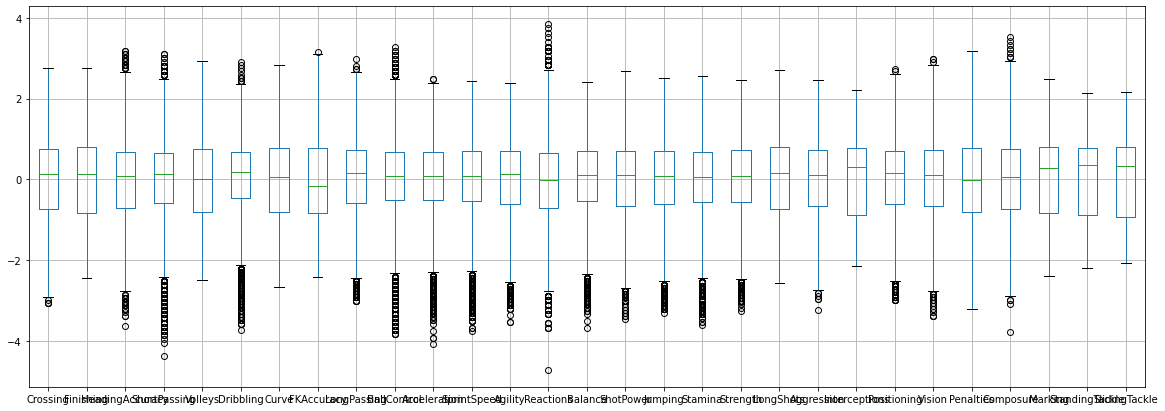

In [60]:
x.boxplot(figsize=(20,7))

An example of representing just one attribute

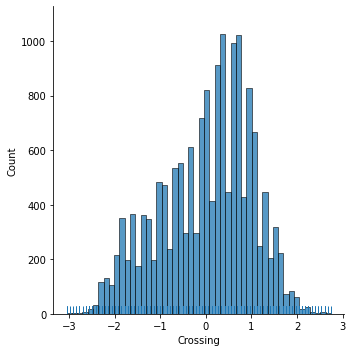

In [61]:
sns.displot(x["Crossing"],kde=False,rug=True)

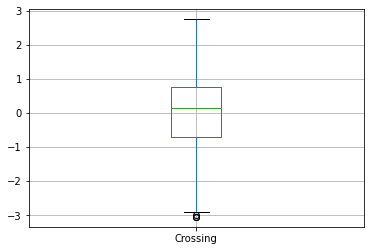

In [62]:
x.boxplot(column=["Crossing"])

In [63]:
x.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,...,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04,1.612200e+04
mean,7.536460e-17,-1.192171e-16,-1.048934e-16,2.186014e-16,2.335862e-16,6.699076e-17,-1.582216e-16,1.679176e-16,-1.022490e-16,-2.935253e-16,...,-1.115043e-16,1.101822e-16,-5.332817e-17,-5.024307e-17,-1.009269e-16,1.859875e-16,2.573855e-16,8.814573e-17,1.324390e-16,6.853331e-17
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-3.057317e+00,-2.427937e+00,-3.624576e+00,-4.358066e+00,-2.485882e+00,-3.723772e+00,-2.657993e+00,-2.417581e+00,-2.994975e+00,-3.815156e+00,...,-2.571125e+00,-3.224605e+00,-2.150642e+00,-2.986324e+00,-3.366531e+00,-3.207810e+00,-3.778934e+00,-2.399507e+00,-2.186518e+00,-2.067644e+00
25%,-7.215970e-01,-8.403418e-01,-6.949426e-01,-5.766837e-01,-7.945789e-01,-4.467976e-01,-8.091610e-01,-8.250349e-01,-5.732789e-01,-5.194455e-01,...,-7.274096e-01,-6.633036e-01,-8.738860e-01,-6.012735e-01,-6.558954e-01,-8.098061e-01,-7.242857e-01,-8.313175e-01,-8.824502e-01,-9.199591e-01
50%,1.277559e-01,1.366401e-01,8.054850e-02,1.387129e-01,1.724664e-02,1.926122e-01,4.922536e-02,-1.614739e-01,1.532299e-01,7.977460e-02,...,1.626596e-01,9.816446e-02,2.964737e-01,1.483138e-01,1.185720e-01,-1.047137e-02,6.401057e-02,2.722231e-01,3.694553e-01,3.320605e-01
75%,7.647706e-01,8.083151e-01,6.837082e-01,6.497105e-01,7.614201e-01,6.721695e-01,7.755523e-01,7.675114e-01,7.182923e-01,6.789947e-01,...,7.984234e-01,7.211838e-01,7.752572e-01,6.934682e-01,7.381459e-01,7.888634e-01,7.537698e-01,7.949529e-01,7.867571e-01,8.015678e-01
max,2.746594e+00,2.762279e+00,3.182513e+00,3.102499e+00,2.926288e+00,2.910104e+00,2.822474e+00,3.156331e+00,2.978542e+00,3.275615e+00,...,2.705715e+00,2.451793e+00,2.211608e+00,2.737797e+00,2.984101e+00,3.186868e+00,3.512807e+00,2.479304e+00,2.142988e+00,2.157922e+00


**Saving** attributes matrix *x* and target labels *t*  to csv files.

In [64]:
x.to_csv (ATT_FILE_NAME, index=False)
one_hot_t.to_csv(ONE_HOT_ENCODED_CLASSES_FILE_NAME, index=False)